In [25]:
import torch

In [26]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier



In [27]:
df = pd.read_csv( "C:\\Users\\aroon\\Desktop\\MSDS\\422\\MSDS422\\Unit 3\\ImputedDataset.csv" )
dt = df.dtypes
TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"
df.head


<bound method NDFrame.head of       TARGET_BAD_FLAG  TARGET_LOSS_AMT   LOAN      MORTDUE         VALUE  \
0                   1            641.0   1100  25860.00000   39025.00000   
1                   1           1109.0   1300  70053.00000   68400.00000   
2                   1            767.0   1500  13500.00000   16700.00000   
3                   1           1425.0   1500  67858.02728   95919.28017   
4                   0              NaN   1700  97800.00000  112000.00000   
...               ...              ...    ...          ...           ...   
5955                0              NaN  88900  57264.00000   90185.00000   
5956                0              NaN  89000  54576.00000   92937.00000   
5957                0              NaN  89200  54045.00000   92924.00000   
5958                0              NaN  89800  50370.00000   91861.00000   
5959                0              NaN  89900  48811.00000   88934.00000   

       YOJ     DEROG  DELINQ       CLAGE      NINQ       

In [49]:
df.isnull().sum()


TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE               0
VALUE                 0
YOJ                   0
DEROG                 0
DELINQ                0
CLAGE                 0
NINQ                  0
CLNO                  0
DEBTINC               0
REASON                0
JOB                   0
dtype: int64

In [117]:
"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=2)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

##print( "FLAG DATA" )
##print( "TRAINING = ", X_train.shape )
##print( "TEST = ", X_test.shape )


F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")



       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            941.0       941.000000
mean               1.0     13634.824655
std                0.0     10836.172568
min                1.0       224.000000
25%                1.0      5837.000000
50%                1.0     11266.000000
75%                1.0     18069.000000
max                1.0     78987.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            248.0       248.000000
mean               1.0     12578.879032
std                0.0     10833.019569
min                1.0       320.000000
25%                1.0      4921.000000
50%                1.0      9693.500000
75%                1.0     15601.250000
max                1.0     73946.000000





In [118]:
from sklearn.preprocessing import MinMaxScaler
theScaler = MinMaxScaler()
theScaler.fit( X_train )

MinMaxScaler()

In [119]:
U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_train.columns.values )


In [120]:

#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [121]:

##### Creating Tensors
U_train=torch.FloatTensor(U_train.values)
U_test=torch.FloatTensor(U_test.values)
Y_train=torch.LongTensor(Y_train[TARGET_F].values)
Y_test=torch.LongTensor(Y_test[TARGET_F].values)


In [122]:

#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=12,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [123]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [125]:
model.parameters


<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=12, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [126]:

###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [127]:
U_train.shape

torch.Size([4768, 12])

In [137]:

Y_test

tensor([0, 0, 1,  ..., 0, 0, 0])

In [129]:

epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    Y_pred=model.forward(U_train)
    loss=loss_function(Y_pred,Y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.7684082984924316
Epoch number: 11 and the loss : 0.49721306562423706
Epoch number: 21 and the loss : 0.4847882091999054
Epoch number: 31 and the loss : 0.47210365533828735
Epoch number: 41 and the loss : 0.455244243144989
Epoch number: 51 and the loss : 0.42478498816490173
Epoch number: 61 and the loss : 0.3983658254146576
Epoch number: 71 and the loss : 0.38689467310905457
Epoch number: 81 and the loss : 0.3803662657737732
Epoch number: 91 and the loss : 0.3764767348766327
Epoch number: 101 and the loss : 0.3734325170516968
Epoch number: 111 and the loss : 0.3704659342765808
Epoch number: 121 and the loss : 0.36748480796813965
Epoch number: 131 and the loss : 0.3640311360359192
Epoch number: 141 and the loss : 0.3605448007583618
Epoch number: 151 and the loss : 0.3568449020385742
Epoch number: 161 and the loss : 0.354106605052948
Epoch number: 171 and the loss : 0.3509662449359894
Epoch number: 181 and the loss : 0.3488205671310425
Epoch number: 191 an

In [130]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

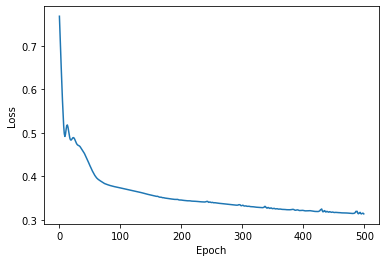

In [131]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [142]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(U_test):
        Y_pred=model(data)
        predictions.append(Y_pred.argmax().item())
        print(Y_pred.argmax().item())

0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0


In [143]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
cm

array([[902,  42],
       [141, 107]], dtype=int64)

In [144]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,predictions)
score

0.8464765100671141